<a href="https://colab.research.google.com/github/ErickPower/CPSC501-Assignment4/blob/master/part2/notMNISTStarter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!git init
!git remote add origin https://github.com/ErickPower/CPSC501-Assignment4.git
!git pull origin master

Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/ErickPower/CPSC501-Assignment4
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  print("Tensorflow already loaded.")
  pass

Upload notMNIST.npz

In [0]:
#from google.colab import files
#uploaded = files.upload()

In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("--Get data--")
with np.load("notMNIST.npz", allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']

print("--Process data--")
print(len(y_train))
x_train, x_test = x_train / 255.0, x_test / 255.0
 
print("--Make model--")
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(600, activation='relu'),
  tf.keras.layers.Dense(400, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

optim = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


print("--Fit model--")
model.fit(x_train, y_train, epochs=40, verbose=2)

print("--Evaluate model--")
model_loss, model_acc = model.evaluate(x_test,  y_test, verbose=2) 
print(f"Model Loss:    {model_loss:.2f}")
print(f"Model Accuray: {model_acc*100:.1f}%")

--Get data--
--Process data--
60000
--Make model--
--Fit model--
Train on 60000 samples
Epoch 1/40
60000/60000 - 15s - loss: 0.5722 - accuracy: 0.8276
Epoch 2/40
60000/60000 - 15s - loss: 0.4265 - accuracy: 0.8693
Epoch 3/40
60000/60000 - 16s - loss: 0.3724 - accuracy: 0.8858
Epoch 4/40
60000/60000 - 15s - loss: 0.3272 - accuracy: 0.8978
Epoch 5/40
60000/60000 - 15s - loss: 0.2926 - accuracy: 0.9074
Epoch 6/40
60000/60000 - 15s - loss: 0.2625 - accuracy: 0.9167
Epoch 7/40
60000/60000 - 15s - loss: 0.2332 - accuracy: 0.9264
Epoch 8/40
60000/60000 - 15s - loss: 0.2074 - accuracy: 0.9332
Epoch 9/40
60000/60000 - 15s - loss: 0.1857 - accuracy: 0.9407
Epoch 10/40
60000/60000 - 15s - loss: 0.1626 - accuracy: 0.9481
Epoch 11/40
60000/60000 - 15s - loss: 0.1514 - accuracy: 0.9520
Epoch 12/40
60000/60000 - 15s - loss: 0.1371 - accuracy: 0.9565
Epoch 13/40
60000/60000 - 15s - loss: 0.1223 - accuracy: 0.9615
Epoch 14/40
60000/60000 - 15s - loss: 0.1098 - accuracy: 0.9654
Epoch 15/40
60000/60000 -

In [0]:
#Save Model to notMNIST.h5
model.save("notMNIST.h5")

In [0]:
#push model to github

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [0]:
class_names = ['A','B','C','D','E','F','G','H','I','J']

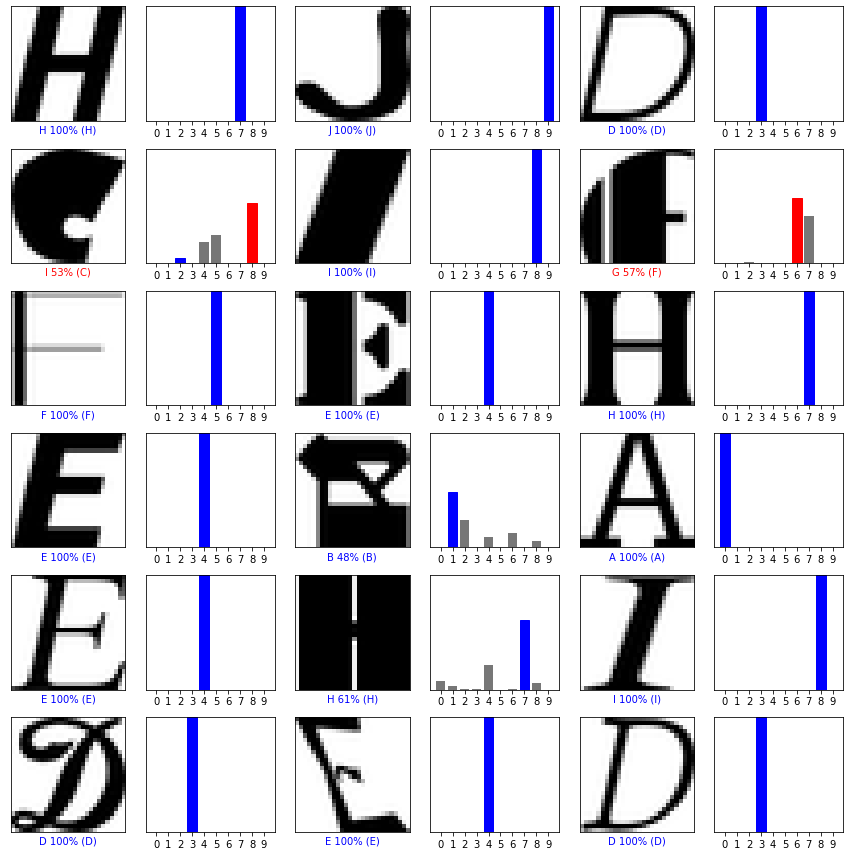

In [27]:
predictions = model.predict(x_test)
num_rows = 6
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+num_images, predictions[i+num_images], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+num_images, predictions[i+num_images], y_test)
plt.tight_layout()
plt.show()

In [0]:
#from google.colab import files
#files.download('notMNIST.h5')